In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, precision_score, f1_score,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
df_model = pd.read_csv('../datasets/df_model.csv')

In [4]:
X = df_model.drop(['objetivo','date','retweets','favorites','user_followers','Volume','Open'], axis=1)
y = df_model['objetivo'].astype('int')

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   compound            4053 non-null   float64
 1   sentiment_avg       4053 non-null   float64
 2   sentiment_avg_lag1  4053 non-null   float64
 3   sentiment_avg_3d    4053 non-null   float64
 4   infl_rt             4053 non-null   float64
 5   infl_fav            4053 non-null   float64
 6   infl_followers      4053 non-null   float64
 7   infl_total          4053 non-null   float64
dtypes: float64(8)
memory usage: 253.4 KB


In [5]:
print(y.unique())
print(y.dtype)
print(y.value_counts())

[1 0]
int32
objetivo
1    2042
0    2011
Name: count, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
bosque_aleatorio_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
bosque_aleatorio_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [8]:
y_pred = bosque_aleatorio_clf.predict(X_test)

In [9]:
print("Tipo de y_pred:", type(y_pred))
print("Valores únicos en y_pred:", np.unique(y_pred))

Tipo de y_pred: <class 'numpy.ndarray'>
Valores únicos en y_pred: [0 1]


In [10]:
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       532
           1       0.89      0.92      0.91       482

    accuracy                           0.91      1014
   macro avg       0.91      0.91      0.91      1014
weighted avg       0.91      0.91      0.91      1014



In [11]:
print("Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusión:

[[479  53]
 [ 37 445]]


In [12]:
scores = cross_val_score(bosque_aleatorio_clf, X, y, cv=5, scoring='f1')
print(f"F1 Score (cross-val): {scores.mean():.4f}")

F1 Score (cross-val): 0.5251


C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_4688\1079820467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette='crest')


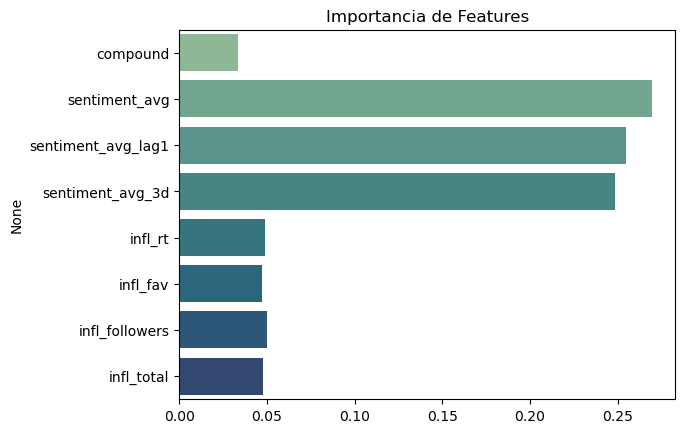

In [33]:
importances = bosque_aleatorio_clf.feature_importances_
feat_names = X.columns

sns.barplot(x=importances, y=feat_names, palette='crest')
plt.title("Importancia de Features")
plt.show()

In [ ]:
# Regresion Logistica
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [15]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=500, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('bag', BaggingClassifier(n_estimators=50, random_state=42))
    ],
    voting='soft' 
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500,
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('bag',
                              BaggingClassifier(n_estimators=50,
                                                random_state=42))],
                 voting='soft')

In [16]:
#Bagging Classifier
bagging_clf = BaggingClassifier(n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=42)

In [17]:
modelos = {
    'Regresión Logística': log_reg,
    'Voting Soft': voting_clf,
    'Bagging': bagging_clf
}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"\n--> {nombre}")
    print(f"F1: {f1:.4f}")
    print(classification_report(y_test, y_pred))



--> Regresión Logística
F1: 0.5738
              precision    recall  f1-score   support

           0       0.58      0.45      0.51       532
           1       0.52      0.65      0.57       482

    accuracy                           0.54      1014
   macro avg       0.55      0.55      0.54      1014
weighted avg       0.55      0.54      0.54      1014


--> Voting Soft
F1: 0.9562
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       532
           1       0.94      0.97      0.96       482

    accuracy                           0.96      1014
   macro avg       0.96      0.96      0.96      1014
weighted avg       0.96      0.96      0.96      1014


--> Bagging
F1: 0.9713
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       532
           1       0.96      0.98      0.97       482

    accuracy                           0.97      1014
   macro avg       0.97      0.97      0

In [18]:
#Validacion Cruzada
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=5, scoring='f1')
    print(f"\nCross-val F1 - {nombre}: {scores.mean():.4f}")


Cross-val F1 - Regresión Logística: 0.5593

Cross-val F1 - Voting Soft: 0.5265

Cross-val F1 - Bagging: 0.5276


In [36]:
gb_clf = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.2,
    max_depth=4,
    random_state=42
)

gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Gradient Boosting Classifier")
print(f"F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier
F1-score: 0.9804
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       532
           1       0.97      0.99      0.98       482

    accuracy                           0.98      1014
   macro avg       0.98      0.98      0.98      1014
weighted avg       0.98      0.98      0.98      1014



In [37]:
#Validacion Cruzada Gradient Boosting
print("\nValidación Cruzada Gradient Boosting")
scores = cross_val_score(gb_clf, X, y, cv=5, scoring='f1')
print(f" F1 promedio (cross-val): {scores.mean():.4f}")



Validación Cruzada Gradient Boosting
 F1 promedio (cross-val): 0.5340


In [19]:
#Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(
    n_estimators=160,
    learning_rate=0.3,
    max_depth=3,
    random_state=42
)

gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Gradient Boosting Classifier")
print(f"F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier
F1-score: 0.9774
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       532
           1       0.97      0.99      0.98       482

    accuracy                           0.98      1014
   macro avg       0.98      0.98      0.98      1014
weighted avg       0.98      0.98      0.98      1014



In [21]:
#Validacion Cruzada Gradient Boosting
print("\nValidación Cruzada Gradient Boosting")
scores = cross_val_score(gb_clf, X, y, cv=5, scoring='f1')
print(f" F1 promedio (cross-val): {scores.mean():.4f}")



Validación Cruzada Gradient Boosting
 F1 promedio (cross-val): 0.5353


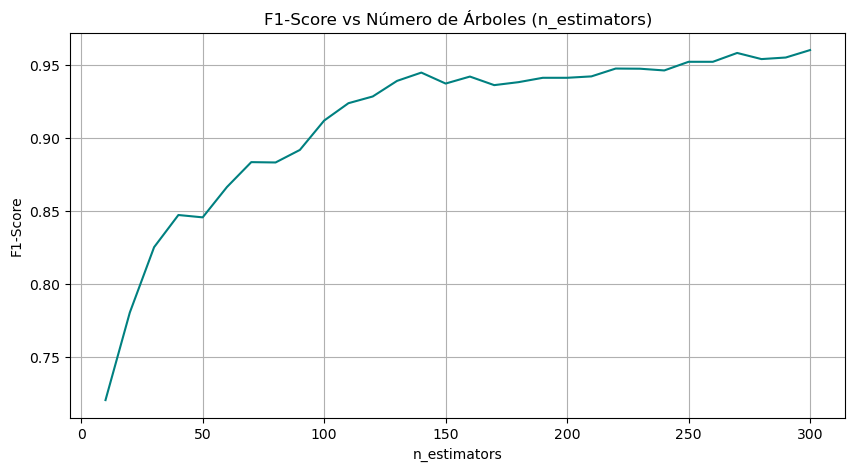

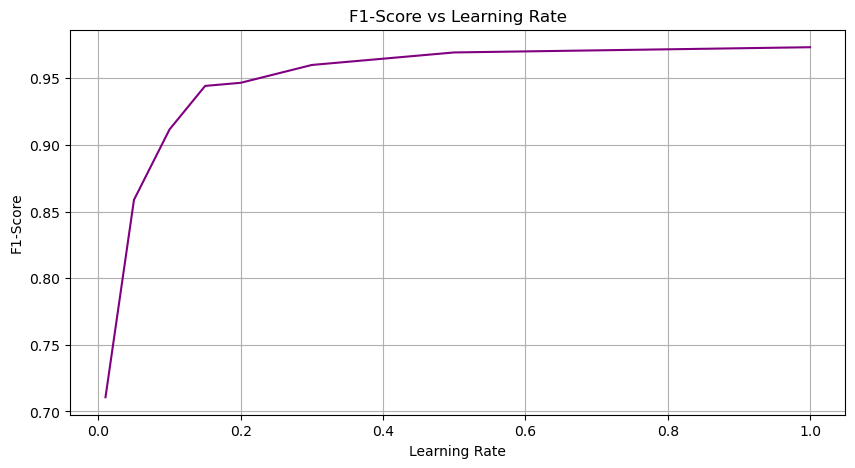

In [22]:
# Graficas para encontrar el f1 y n estimators optimo


# F1 vs n_estimators


estimators_range = range(10, 301, 10)
f1_scores_estimators = []

for n in estimators_range:
    model = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores_estimators.append(f1)

plt.figure(figsize=(10, 5))
plt.plot(estimators_range, f1_scores_estimators, color='teal')
plt.title('F1-Score vs Número de Árboles (n_estimators)')
plt.xlabel('n_estimators')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()


# F1 vs learning_rate


learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
f1_scores_lr = []

for lr in learning_rates:
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores_lr.append(f1)

plt.figure(figsize=(10, 5))
plt.plot(learning_rates, f1_scores_lr, color='purple')
plt.title('F1-Score vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()


In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd

# -------------------------------
# 1. Modelos a comparar
# -------------------------------

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=160, learning_rate=0.3, max_depth=3, random_state=42),
    "Bagging Classifier": BaggingClassifier(n_estimators=500, random_state=42),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=500, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
            ('bag', BaggingClassifier(n_estimators=50, random_state=42))
        ]
        ,
        voting='soft'
    )
}

# -------------------------------
# 2. Configuración del K-Fold
# -------------------------------

kf = StratifiedKFold(n_splits=5, shuffle=False)
scoring = make_scorer(f1_score)

# -------------------------------
# 3. Evaluación de cada modelo
# -------------------------------

resultados = []

for nombre, modelo in modelos.items():
    f1_scores = cross_val_score(modelo, X, y, cv=kf, scoring=scoring, n_jobs=-1)
    resultados.append({
        "Modelo": nombre,
        "F1 Promedio": np.mean(f1_scores),
        "F1 Desviación Std": np.std(f1_scores)
    })

# -------------------------------
# 4. Mostrar resultados ordenados
# -------------------------------

df_resultados = pd.DataFrame(resultados).sort_values(by="F1 Promedio", ascending=False)
print(df_resultados.to_string(index=False))


             Modelo  F1 Promedio  F1 Desviación Std
Logistic Regression     0.559341           0.091283
  Gradient Boosting     0.535305           0.051647
 Bagging Classifier     0.528941           0.065289
  Voting Classifier     0.526539           0.052772
      Random Forest     0.525054           0.047852


In [25]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd

# -------------------------------
# 1. Modelos a comparar
# -------------------------------

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=160, learning_rate=0.3, max_depth=3, random_state=42),
    "Bagging Classifier": BaggingClassifier(n_estimators=500, random_state=42),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=500, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
            ('bag', BaggingClassifier(n_estimators=50, random_state=42))
        ]
        ,
        voting='soft'
    )
}

# -------------------------------
# 2. Configuración del TimeSeriesSplit
# -------------------------------
tscv = TimeSeriesSplit(n_splits=5)
scoring = make_scorer(f1_score)

# -------------------------------
# 3. Evaluar cada modelo
# -------------------------------
resultados = []

for nombre, modelo in modelos.items():
    f1_scores = cross_val_score(modelo, X, y, cv=tscv, scoring=scoring, n_jobs=-1)
    resultados.append({
        "Modelo": nombre,
        "F1 Promedio": np.mean(f1_scores),
        "F1 Desviación Std": np.std(f1_scores)
    })

# -------------------------------
# 4. Mostrar resultados ordenados
# -------------------------------
df_resultados = pd.DataFrame(resultados).sort_values(by="F1 Promedio", ascending=False)
print(df_resultados.to_string(index=False))


             Modelo  F1 Promedio  F1 Desviación Std
 Bagging Classifier     0.494020           0.060326
  Voting Classifier     0.489733           0.058361
      Random Forest     0.487034           0.062366
  Gradient Boosting     0.482665           0.066270
Logistic Regression     0.411279           0.119760


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Diccionario de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

modelo = GradientBoostingClassifier(random_state=42)

# Configuración del GridSearch
grid = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring='f1',       # Puede cambiar a 'roc_auc' o 'accuracy' si te interesa otro ángulo
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Usa todos los núcleos que tu máquina pueda sobrevivir
    verbose=2           # Para que veas cómo va la tortura computacional
)

# Entrenamiento
grid.fit(X, y)

# Resultados
print("🎯 Mejores parámetros encontrados:")
print(grid.best_params_)
print(f"🏆 Mejor F1-score promedio (cross-val): {grid.best_score_:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
🎯 Mejores parámetros encontrados:
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 1.0}
🏆 Mejor F1-score promedio (cross-val): 0.5340
